# Import Dependencies 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
from warnings import simplefilter
simplefilter(action='ignore')

In [5]:
df=pd.read_csv(r'synthetic_logs.csv')
df.head()

,timestamp,source,log_message,target_label,complexity
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert


# Data Inspection

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   timestamp     2410 non-null   object
 1   source        2410 non-null   object
 2   log_message   2410 non-null   object
 3   target_label  2410 non-null   object
 4   complexity    2410 non-null   object
dtypes: object(5)
memory usage: 94.3+ KB


In [7]:
df.shape

(2410, 5)

In [8]:
df['target_label'].value_counts()

target_label
HTTP Status            1017
Security Alert          371
System Notification     356
Error                   177
Resource Usage          177
Critical Error          161
User Action             144
Workflow Error            4
Deprecation Warning       3
Name: count, dtype: int64

# Data Preprocessing

In [9]:
df['timestamp']=pd.to_datetime(df['timestamp'],format='mixed')

In [10]:
df.isnull().sum()

timestamp       0
source          0
log_message     0
target_label    0
complexity      0
dtype: int64

In [11]:
print("Duplicates",df.duplicated().sum())

Duplicates 0


# EDA(Exploratory Data Analysis)

In [12]:
from wordcloud import WordCloud,STOPWORDS

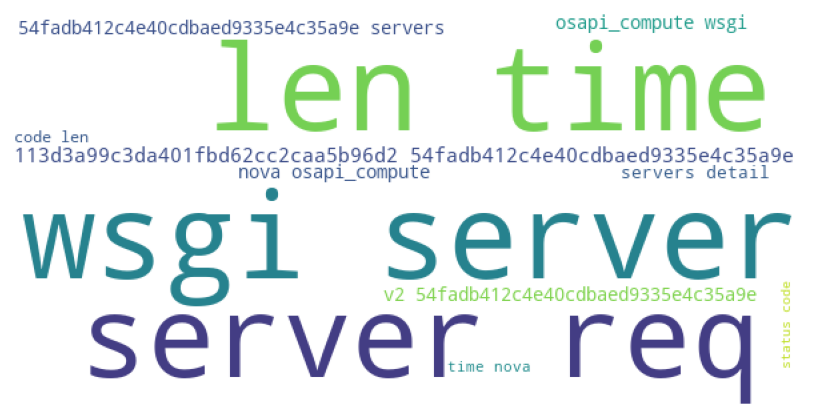

In [13]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in df.log_message:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 600, height = 300,
                background_color ='white',

                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Feature Engineering

In [14]:
from sentence_transformers import SentenceTransformer

In [83]:
model_embeddings=SentenceTransformer('all-MiniLm-L6-v2')

In [ ]:
embeddings=model_embeddings.encode(df['log_message'].tolist())

# Clustering(DBSCAN)

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
dbscan=DBSCAN(eps=0.2,min_samples=1,metric='euclidean')

clusters=dbscan.fit_predict(embeddings)

In [19]:
df['clusters']=clusters

In [20]:
df['clusters'].unique()

array([   0,    1,    2, ..., 1061, 1062, 1063], shape=(1064,))

In [21]:
df[df['clusters']==7]

,timestamp,source,log_message,target_label,complexity,clusters
8,2025-02-12 10:42:29,ThirdPartyAPI,nova.compute.claims [req-a07ac654-8e81-416d-bf...,Resource Usage,bert,7
197,2025-12-13 14:16:52,ModernHR,nova.compute.claims [req-9118475d-6e72-48fa-9d...,Resource Usage,bert,7
240,2025-05-25 12:11:09,ThirdPartyAPI,nova.compute.claims [req-4b4dd551-26d8-48e2-bd...,Resource Usage,bert,7
355,2025-10-30 11:34:10,BillingSystem,nova.compute.claims [req-6f9ecdfe-481c-4535-9b...,Resource Usage,bert,7
451,2025-09-13 06:02:40,ThirdPartyAPI,nova.compute.claims [req-01d570b0-78a7-4719-b7...,Resource Usage,bert,7
514,2025-02-11 03:02:06,AnalyticsEngine,nova.compute.claims [req-3d26bc3d-373c-4269-b0...,Resource Usage,bert,7
546,2025-08-23 14:50:25,AnalyticsEngine,nova.compute.claims [req-d6986b54-3735-4a42-90...,Resource Usage,bert,7
613,2025-01-10 06:50:08,BillingSystem,nova.compute.claims [req-6a763803-4838-49c7-81...,Resource Usage,bert,7
701,2025-05-24 22:54:38,ModernHR,nova.compute.claims [req-2d658d2c-7eff-414e-a6...,Resource Usage,bert,7
749,2025-12-10 06:01:17,ThirdPartyAPI,nova.compute.claims [req-5c8f52bd-8e3c-41f0-95...,Resource Usage,bert,7


In [23]:
clusters_count=df['clusters'].value_counts()
clusters_count[0:4]

clusters
0     406
4     159
3     143
12     60
Name: count, dtype: int64

In [25]:
large_clusters=clusters_count[clusters_count>8].index
large_clusters

Index([  0,   4,   3,  12,  50,  67,  58,  46,  14,  19,  96,  39,  27, 127,
        16,  68,   7,  80,  25,  84,  15,  73, 218],
      dtype='int64', name='clusters')

In [26]:
for cluster in large_clusters:
  print(f"Cluster {cluster}")
  print(df[df['clusters']==cluster]['log_message'].head(5).to_string(index=False))

Cluster 0
nova.osapi_compute.wsgi.server [req-b9718cd8-f6...
nova.osapi_compute.wsgi.server [req-4895c258-b2...
nova.osapi_compute.wsgi.server [req-d4f8d0c2-4f...
nova.osapi_compute.wsgi.server [req-6fe0e366-f2...
nova.osapi_compute.wsgi.server [req-945d1f31-a2...
Cluster 4
nova.osapi_compute.wsgi.server [req-f0bffbc3-5a...
nova.osapi_compute.wsgi.server [req-5e6e042b-f9...
nova.osapi_compute.wsgi.server [req-4d05bae9-8a...
nova.osapi_compute.wsgi.server [req-9174a757-01...
nova.osapi_compute.wsgi.server [req-b2ffcdcc-26...
Cluster 3
nova.osapi_compute.wsgi.server [req-ee8bc8ba-92...
nova.osapi_compute.wsgi.server [req-2bf7cfee-a2...
nova.osapi_compute.wsgi.server [req-5f1c2027-e1...
nova.osapi_compute.wsgi.server [req-4e83daf7-a2...
nova.osapi_compute.wsgi.server [req-fe9ef402-d3...
Cluster 12
Backup completed successfully.
Backup completed successfully.
Backup completed successfully.
Backup completed successfully.
Backup completed successfully.
Cluster 50
nova.metadata.wsgi.server [r

In [27]:
df[df['target_label']=='System Notification']['log_message'].value_counts()

log_message
Backup completed successfully.              60
Disk cleanup completed successfully.        51
System updated to version 1.2.9.             2
System reboot initiated by user User876.     2
System reboot initiated by user User648.     2
                                            ..
Backup ended at 2025-05-15 10:56:20.         1
System updated to version 1.0.7.             1
Backup ended at 2025-09-19 08:52:02.         1
System updated to version 2.7.8.             1
Backup ended at 2025-05-06 11:23:16.         1
Name: count, Length: 242, dtype: int64

# Hybrid Classification Model

In [28]:
import re

In [29]:
def classify_with_regex(log_message):
  regex_pattern={
      r"User User\d+ logged (in|out).":"User Action",
      r"Backup (started|ended) at .*":"System Notification",
      r"Backup completed successfully.": "System Notification",
      r"System updated to version .*":"System Notification",
      r"File .* uploaded successfully by user .*":"System Notification",
      r"Disk cleanup completed successfully.":"System Notification",
      r"System reboot initiated by user .*":"System Notification",
      r"Account with ID .* created by .*":"User Action"
  }


  for pattern ,label in regex_pattern.items():
    if re.search(pattern,log_message,re.IGNORECASE):
      return label
  return None

In [30]:
a=classify_with_regex("User User494 logged OUT.")
a

'User Action'

In [36]:
df['regex_label']=df['log_message'].apply(classify_with_regex)
df[df.regex_label!=None] #it won't work beacuse here the pandas stored it as a null values so we have to use isnull() to check it out

,timestamp,source,log_message,target_label,complexity,clusters,regex_label
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0,None
1,2025-01-14 23:07:00,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1,None
2,2025-01-17 01:29:00,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,2,None
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0,None
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,3,None
...,...,...,...,...,...,...,...
2405,2025-08-13 07:29:25,ModernHR,nova.osapi_compute.wsgi.server [req-96c3ec98-2...,HTTP Status,bert,4,None
2406,2025-01-11 05:32:00,ModernHR,User 3844 account experienced multiple failed ...,Security Alert,bert,1061,None
2407,2025-08-03 03:07:47,ThirdPartyAPI,nova.metadata.wsgi.server [req-b6d4a270-accb-4...,HTTP Status,bert,172,None
2408,2025-11-11 11:52:00,BillingSystem,Email service affected by failed transmission,Critical Error,bert,1062,None


In [40]:
df['regex_label']=df['log_message'].apply(classify_with_regex)
df[df.regex_label.notnull()].head()

,timestamp,source,log_message,target_label,complexity,clusters,regex_label
7,2025-10-11 08:44:00,ModernHR,File data_6169.csv uploaded successfully by us...,System Notification,regex,6,System Notification
14,2025-01-04 01:43:00,ThirdPartyAPI,File data_3847.csv uploaded successfully by us...,System Notification,regex,11,System Notification
15,2025-05-01 09:41:00,ModernCRM,Backup completed successfully.,System Notification,regex,12,System Notification
18,2025-02-22 17:49:00,ModernCRM,Account with ID 5351 created by User634.,User Action,regex,13,User Action
27,2025-09-24 19:57:00,ThirdPartyAPI,User User685 logged out.,User Action,regex,17,User Action


In [41]:
df_non_regex=df[df['regex_label'].isnull()].copy()
df_non_regex.shape

(1910, 7)

In [42]:
df_non_regex.head()

,timestamp,source,log_message,target_label,complexity,clusters,regex_label
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0,None
1,2025-01-14 23:07:00,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1,None
2,2025-01-17 01:29:00,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,2,None
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0,None
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,3,None


In [43]:
df_non_regex['target_label'].value_counts()

target_label
HTTP Status            1017
Security Alert          371
Error                   177
Resource Usage          177
Critical Error          161
Workflow Error            4
Deprecation Warning       3
Name: count, dtype: int64

In [44]:
# Here we can see we get very less no of values for workflow  and deprication Warning so we can't able to train it 

In [55]:
df_classification=df_non_regex[(df['target_label']!='Workflow Error')&(df['target_label']!='Deprecation Warning')]
df_classification.head()

,timestamp,source,log_message,target_label,complexity,clusters,regex_label
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,0,None
1,2025-01-14 23:07:00,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,1,None
2,2025-01-17 01:29:00,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,2,None
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,0,None
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,3,None


In [56]:
df_classification['target_label'].value_counts()

target_label
HTTP Status       1017
Security Alert     371
Error              177
Resource Usage     177
Critical Error     161
Name: count, dtype: int64

In [ ]:
filtered_embeddings=model_embeddings.encode(df_classification['log_message'].tolist())
filtered_embeddings[1]

array([ 8.04571714e-03, -3.57392281e-02,  4.93873917e-02, -7.19184149e-03,
        6.17644750e-04, -9.05685052e-02,  5.75594865e-02, -4.39446270e-02,
        1.74751636e-02,  5.21203242e-02, -4.62332033e-02,  2.49039363e-02,
        4.80811782e-02,  6.86636567e-02,  3.56146656e-02,  3.00089642e-02,
        2.61449497e-02, -9.05241296e-02, -8.02173615e-02,  5.04851192e-02,
       -7.90870488e-02, -1.76855002e-03, -2.48927530e-02,  9.02152434e-02,
        5.83698181e-03, -6.91070855e-02, -6.67966083e-02, -6.99113635e-03,
       -1.04565986e-01, -2.66473852e-02,  3.05640064e-02,  2.02934369e-02,
        2.25454886e-02, -4.22687922e-03,  1.11173484e-02,  6.78260773e-02,
        1.06073590e-02,  7.56636113e-02, -8.22777823e-02,  8.45735706e-03,
       -6.97612464e-02, -4.21974584e-02, -1.05674397e-02,  2.23673340e-02,
        5.64496815e-02,  8.16500373e-03,  1.09344080e-01,  3.16564441e-02,
       -1.76923554e-02, -3.21071148e-02, -3.39975841e-02, -4.91802581e-04,
        3.72874690e-03,  

## Train Test split

In [68]:
X=filtered_embeddings
y=df_classification['target_label']

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1427, 384), (476, 384), (1427,), (476,))

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model_cls=LogisticRegression()

model_cls.fit(X_train,y_train)


LogisticRegression()

## Model Evaluation

In [71]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
y_pred=model_cls.predict(X_test)


Text(120.72222222222221, 0.5, 'Truth')

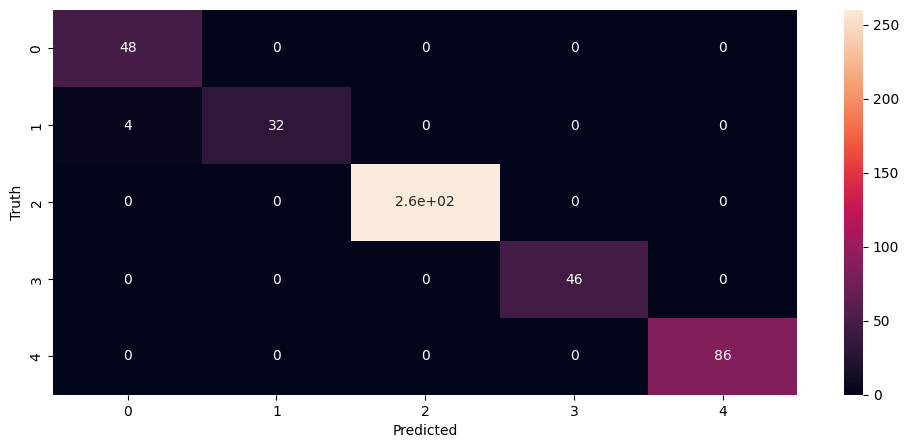

In [75]:
cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(12,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [77]:
cls=classification_report(y_test,y_pred)
print(cls)

                precision    recall  f1-score   support

Critical Error       0.92      1.00      0.96        48
         Error       1.00      0.89      0.94        36
   HTTP Status       1.00      1.00      1.00       260
Resource Usage       1.00      1.00      1.00        46
Security Alert       1.00      1.00      1.00        86

      accuracy                           0.99       476
     macro avg       0.98      0.98      0.98       476
  weighted avg       0.99      0.99      0.99       476



In [ ]:
import pickle

with open ('logistic_model.pkl','wb') as f:
    pickle.dump(model_cls,f)

In [ ]:
log_embedding=model_embeddings.encode("Unauthorized access to data was attempted").reshape(1,-1) #To get a two dimensional array object
prob=model_cls.predict_proba(log_embedding)
prob.reshape(-1)

array([0.0062001 , 0.03077783, 0.00410472, 0.00316672, 0.95575063])

array(['Security Alert'], dtype=object)